<a href="https://colab.research.google.com/github/shiv01212-max/Airbnb-Data-Analysis/blob/main/Airbnb_project5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

## **Install Pandas Profiling on Google Colab**

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

     \ 34.6 MB 623 kB/s
     |████████████████████████████████| 10.1 MB 68 kB/s 
     |████████████████████████████████| 596 kB 70.8 MB/s 
     |████████████████████████████████| 102 kB 13.2 MB/s 
     |████████████████████████████████| 675 kB 69.0 MB/s 
     |████████████████████████████████| 4.7 MB 40.3 MB/s 
     |████████████████████████████████| 62 kB 892 kB/s 
     |████████████████████████████████| 812 kB 41.3 MB/s 
     |████████████████████████████████| 28.5 MB 49 kB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.1.1-py2.py3-none-any.whl size=261261 sha256=e9133b49ca9426f534b55520474754d5a75954a616c5ed31b6bb14230dd305ba
  Stored in directory: /tmp/pip-ephem-wheel-cache-dnthyif_/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=4ea3933810875745b682139f3a6de4557661afd42a0253f7cdca238ec4cc8a38
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d2

## **Import libraries and get the dataset from path**

In [31]:
#import required libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
from pandas_profiling import ProfileReport
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta

In [2]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Upload Airbnb Dataset
df_path= "/content/drive/MyDrive/AlmaBetter/Capstone Project 1/Airbnb_NYC_2019.csv"
airbnb_df = pd.read_csv(df_path)

In [4]:
# obtain top 5 rows 
airbnb_df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [5]:
# obtain compelete info of DataFrame
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## **Describing Columns of Dataframe**

 Columns of the DataFrame

* **Id-** It is listing id. Whenever a host list its property on Airbnb, a unique id is created, since every id is unique there are 458895 unique id.
As per my observation ,every listing is a listing of unique properties.(means the same property is not listed more than 1)
* **name-** It is the property description. Two properties can have the same name, but they are not the same property, every property in the data are unique, as all of them are having different longitude and latitude, that means every properties are situated in different location. 
* **host_id-** Its the identity id given to individual host (For example- two different host cant have the same host_id). So if we want to count the number of host, we count the unique host_id.
* **neighbourhood_group-** This are the 5 Boroughs of New York city, in which the property is located.
* **neighbourhood-**  This are the towns and villages in New York
* **room_type** Types of properties 
* **price-**  Property price
* **minimum_nights-** It is the minimum number of night you can book a property.
* **number_of_reviews-** Total number of reviews 
* **Calculated_host_listing_count-** The number of times the host has listed its property.
* **availabilitty_365-** the number of days the property were available for booking.


## **Data Cleaning**

#### looking to the columns have null values




In [6]:
#using 'sum' function will show us how many nulls are found in each column in dataset
airbnb_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#### Droping columns which are not required



In [7]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
#dropping columns that are not significant or could be unethical to use for our future data exploration and predictions
airbnb_df.drop(['id'], axis=1, inplace=True)




*   Fill the NaN values in host_name by 'no name'



In [9]:
airbnb_df.loc[airbnb_df.host_name.isna(),'host_name']=airbnb_df.loc[airbnb_df.host_name.isna(),'host_name'].apply(lambda x: "no name")



*   Replace NaN values in 'name' column by 'no description'



In [10]:
airbnb_df.loc[airbnb_df.name.isna(),'name']=airbnb_df.loc[airbnb_df.name.isna(),'name'].apply(lambda x: "no description")

In [11]:
#examing the changes
airbnb_df.head(2)

name  host_id host_name neighbourhood_group  \
0  Clean & quiet apt home by the park     2787      John            Brooklyn   
1               Skylit Midtown Castle     2845  Jennifer           Manhattan   

  neighbourhood  latitude  longitude        room_type  price  minimum_nights  \
0    Kensington  40.64749  -73.97237     Private room    149               1   
1       Midtown  40.75362  -73.98377  Entire home/apt    225               1   

   number_of_reviews last_review  reviews_per_month  \
0                  9  2018-10-19               0.21   
1                 45  2019-05-21               0.38   

   calculated_host_listings_count  availability_365  
0                               6               365  
1                               2               355

#### Replacing NaN values in reviews_per_month with 0


*   We see that there are NA values in reviews_per_month which would be because there were zero reviews.


In [12]:
# Replace NA values with 0 in column reviews_per_month
airbnb_df['reviews_per_month'] = airbnb_df['reviews_per_month'].fillna(0)

In [13]:
# Replace NA values with 0 in column last_review
airbnb_df['last_review'] = airbnb_df['last_review'].fillna(0)

In [14]:
# Verify if Data has any NaN value
airbnb_df.isnull().sum()

name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

#### If price is 0 , replace it by the average price of all similar room_type with similar neighbourhood_group

In [15]:
#Considering 3 column of the dataframe airbnb_df
df1=airbnb_df[['neighbourhood_group','room_type','price']]

#Create dataframe df2 containig price greater than zero
df2=df1[df1.price!=0]

# groupby neighbourhood_group and room_type, And find there average price 
df3=df2.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()
df3

room_type            Entire home/apt  Private room  Shared room
neighbourhood_group                                            
Bronx                     127.506596     66.890937    59.800000
Brooklyn                  178.346202     76.545428    50.773723
Manhattan                 249.257994    116.776622    88.977083
Queens                    147.050573     71.762456    69.020202
Staten Island             173.846591     62.292553    57.444444

In [16]:
# Creat function to extract average price from dataframe df3
def fun(neighbourhood_group,room_type):
 avg_price=df3.loc[neighbourhood_group,room_type]
 return avg_price

In [17]:
# Replace 0 price by the average price from the dataframe df3
airbnb_df['price']=airbnb_df.apply(lambda x: fun(x['neighbourhood_group'],x['room_type'])  if x['price']==0 else x['price'], axis=1 )

In [19]:
airbnb_df.price.describe()

count    48895.00000
mean       152.74227
std        240.14635
min         10.00000
25%         69.00000
50%        106.00000
75%        175.00000
max      10000.00000
Name: price, dtype: float64

#### Find outliers of Price

Text(0.5, 1.0, 'Room Price')

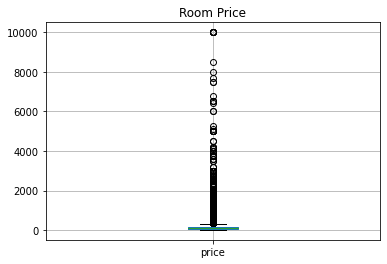

In [23]:
airbnb_df.boxplot('price').set_title('Room Price')

In [24]:
# Finding Q1, Q3 and IQR
Q1 =  airbnb_df['price'].quantile(0.25) #25%
Q3 = airbnb_df['price'].quantile(0.75) # 75%
IQR = Q3 - Q1

In [25]:
# The outlier price
airbnb_df[(airbnb_df['price'] < Q1-1.5*IQR ) | (airbnb_df['price'] > Q3+1.5*IQR)]['price']

61       375.0
85       800.0
103      500.0
114      350.0
121      400.0
         ...  
48758    350.0
48833    475.0
48839    800.0
48842    350.0
48856    345.0
Name: price, Length: 2972, dtype: float64

In [26]:
# Remove outliers from our data set
outliers = (airbnb_df['price'] >= Q1 - 1.5 * IQR) & (airbnb_df['price'] <= Q3 + 1.5 *IQR)
airbnb_df= airbnb_df.loc[outliers]  

Text(0.5, 1.0, 'Price')

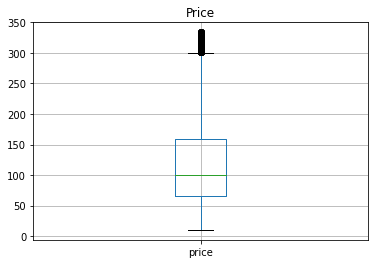

In [28]:
# Box plot after removing the outliers
airbnb_df.boxplot('price').set_title('Price')

In [29]:
airbnb_df.price.describe()

count    45923.00000
mean       119.99330
std         68.13185
min         10.00000
25%         65.00000
50%        100.00000
75%        159.00000
max        334.00000
Name: price, dtype: float64

#### Covert timestring to datetime

In [35]:
airbnb_df.loc[airbnb_df['last_review']!=0,'last_review']=airbnb_df.loc[airbnb_df['last_review']!=0,'last_review'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))

#### Verify cleaned data

In [37]:
airbnb_df.isnull().sum()

name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

## Obtaining pandas profiling report

In [ ]:
profile = ProfileReport(airbnb_df)

In [ ]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#  **Exploring and visualizing the Data**

###  Analysing Neighbourhood groups and room type w.r.t number of properties



In [ ]:
# Obtaining unique values of boroughs(neighbourhood_group)
airbnb_df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [ ]:
# boroughs w.r.t Airbnb apratment count
airbnb_df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'Brooklyn'),
 Text(0, 0, 'Manhattan'),
 Text(0, 0, 'Queens'),
 Text(0, 0, 'Staten Island'),
 Text(0, 0, 'Bronx')]

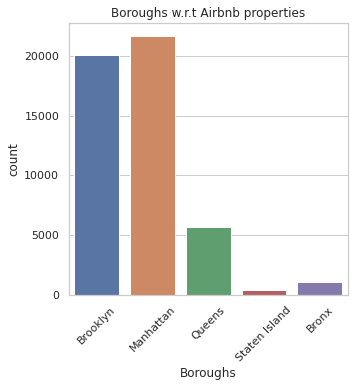

In [ ]:
#create a count plot
plt.figure(figsize=(5,5))
p1=sns.countplot('neighbourhood_group', data= airbnb_df)
p1.set_xlabel('Boroughs')
p1.set_title('Boroughs w.r.t Airbnb properties')
p1.set_xticklabels(p1.get_xticklabels(),rotation=45)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'Brooklyn'),
 Text(0, 0, 'Manhattan'),
 Text(0, 0, 'Queens'),
 Text(0, 0, 'Staten Island'),
 Text(0, 0, 'Bronx')]

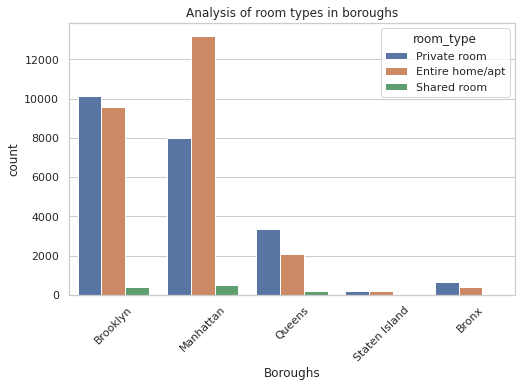

In [ ]:
# visualizing counts of different room types in different neighbourhood groups
plt.figure(figsize=(8,5))
sns.set_style('whitegrid')
p1a=sns.countplot('neighbourhood_group',hue= 'room_type' ,data= airbnb_df)
p1a.set_xlabel('Boroughs')
p1a.set_title('Analysis of room types in boroughs')
p1a.set_xticklabels(p1a.get_xticklabels(),rotation=45)

In [ ]:
# room type by thier count
airbnb_df.room_type.value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'Private room'),
 Text(0, 0, 'Entire home/apt'),
 Text(0, 0, 'Shared room')]

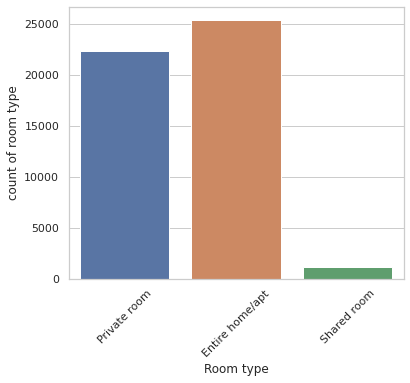

In [ ]:
plt.figure(figsize=(6,5))
sns.set_style('whitegrid')
p2=sns.countplot('room_type', data=airbnb_df)
p2.set_xlabel('Room type')
p2.set_ylabel('count of room type')
p2.set_xticklabels(p2.get_xticklabels(),rotation= 45 )

We can take below observations from above
1. Manhattan has maximum number of properties followed by Brooklyn.
2. Room type Entire home/apt has maximum count in Manhattan followed by Private room.
3. In Brooklyn count of Private room is highest followed by Entire home/apt
4. If we see all 5 boroughs then Count of Entire home/apt is maximum followed by Private room. However count of Shared room is negligible.

### 1. Show trend of popularity or demand in Airbnb

As I am not able to obtain the data on the number of booking made on Airbnb over the years. Instead, I am using ‘number_of_reviews’ as a substitute for the demand of Airbnb rentals. Studying the number of reviews will give us a good understanding of the demand.

**define busiest host**
I would consider the host to be busy, if he frequently receives bookings (that is if the host receives booking  at higher rate).
Since we have not been provided with the booking data, we can consider the number of reviews received  by the host as the minimum number of booking that a host could get. (since the tenants gives review after booking/using the property)

* host with maximum number of reviews is not busiest, but host with max number of reviews per month is the busiest.
* For example host1 gets 10 booking per month is more busier than the host2 who gets 2 booking per month. 


### **HOST_ID**

Lets obtain number of unique host ids as host id is unique for hosts

In [38]:
unique_host_id =airbnb_df['host_id'].value_counts().reset_index().rename(columns={'index':'host_id','host_id':'listing_counts'})
unique_host_id

host_id  listing_counts
0      219517861             272
1      107434423             180
2      137358866             103
3       12243051              95
4       30283594              95
...          ...             ...
35384   95485067               1
35385  167560332               1
35386  263742622               1
35387  205706382               1
35388    1288080               1

[35389 rows x 2 columns]

In [39]:
len(unique_host_id)

35389

Airbnb has total 35389 unique hosts

### **Reviews_per_month**



*   Find the rate of reviews per month, recieved by each host for all its properties (combined) listed on Airbnb



In [40]:
#Create new column 'reviews_in_days'
airbnb_df['reviews_in_days']=(airbnb_df.number_of_reviews/airbnb_df.reviews_per_month)*31  # This calculation gives reviews_in_month, we multiply it by 31 to get reviews in days 

In [41]:
# considerng the following columns only from the original dataframe
df_r=airbnb_df[['host_id','host_name','number_of_reviews','last_review','reviews_in_days']]
df_r.dropna(inplace=True)
df_r.head()

host_id    host_name  number_of_reviews          last_review  \
0     2787         John                  9  2018-10-19 00:00:00   
1     2845     Jennifer                 45  2019-05-21 00:00:00   
3     4869  LisaRoxanne                270  2019-07-05 00:00:00   
4     7192        Laura                  9  2018-11-19 00:00:00   
5     7322        Chris                 74  2019-06-22 00:00:00   

   reviews_in_days  
0      1328.571429  
1      3671.052632  
3      1803.879310  
4      2790.000000  
5      3888.135593

In [42]:
#Convert reviews_in_days columns into deltatime and store it in a
a=pd.to_timedelta(df_r['reviews_in_days'], unit='D')

In [43]:
#create new column "first_review" that stors the date of the first review
df_r['first_review']=df_r['last_review']-a
df_r.head()

host_id    host_name  number_of_reviews          last_review  \
0     2787         John                  9  2018-10-19 00:00:00   
1     2845     Jennifer                 45  2019-05-21 00:00:00   
3     4869  LisaRoxanne                270  2019-07-05 00:00:00   
4     7192        Laura                  9  2018-11-19 00:00:00   
5     7322        Chris                 74  2019-06-22 00:00:00   

   reviews_in_days                  first_review  
0      1328.571429 2015-02-28 10:17:08.571465600  
1      3671.052632 2009-05-01 22:44:12.631574400  
3      1803.879310 2014-07-27 02:53:47.586192000  
4      2790.000000 2011-03-31 00:00:00.000000000  
5      3888.135593 2008-10-28 20:44:44.745792001

In [50]:
# groupby host id and find out the min of the first_review and max of the last_review and sum up all the number of reviews recieved by each host for all its properties
df_r1=df_r.groupby(['host_id','host_name']).agg({'number_of_reviews':'sum','first_review':np.min,'last_review':np.max}).reset_index().rename(columns={'number_of_reviews':'total_reviews'})
df_r1.head()

host_id host_name  total_reviews                  first_review last_review
0     2438     Tasos              1 2016-10-16 07:59:59.999971200  2018-03-17
1     2571     Teedo             27 2013-03-10 20:06:29.189203200  2019-05-21
2     2787      John            105 2015-02-28 10:17:08.571465600  2019-06-26
3     2845  Jennifer             46 2009-05-01 22:44:12.631574400  2019-05-21
4     2868  Letha M.              2 2014-10-01 16:00:00.000028800  2017-07-31

In [51]:
# df_r['total_days_of_reviews']=df_r['first_review']-df1['last_review']
df_r1['Difference'] = df_r1['last_review'].sub(df_r1['first_review'], axis=0)
# Extract days from Difference(datetime) column
df_r1['Difference'] = df_r1['Difference'].apply(lambda x: x.days)
# This dfference is in days we convert it into months by dividing it by 31days
df_r1['Difference'] = df_r1['Difference']/31
df_r1.rename(columns={'Difference':'Difference_in_months'},inplace=True)
df_r1.head()

host_id host_name  total_reviews                  first_review last_review  \
0     2438     Tasos              1 2016-10-16 07:59:59.999971200  2018-03-17   
1     2571     Teedo             27 2013-03-10 20:06:29.189203200  2019-05-21   
2     2787      John            105 2015-02-28 10:17:08.571465600  2019-06-26   
3     2845  Jennifer             46 2009-05-01 22:44:12.631574400  2019-05-21   
4     2868  Letha M.              2 2014-10-01 16:00:00.000028800  2017-07-31   

   Difference_in_months  
0             16.645161  
1             72.967742  
2             50.903226  
3            118.419355  
4             33.322581

In [52]:
# rate of reviews per month, recieved by each host for all its properties (combined) listed on Airbnb
df_r1['total_reviews_per_month']=(df_r1.total_reviews/df_r1.Difference_in_months)
df_r2=df_r1.sort_values('total_reviews_per_month', ascending=False).head()
df_r2

host_id     host_name  total_reviews                  first_review  \
27043  219517861  Sonder (NYC)            946 2018-12-12 10:25:27.272697600   
27911  244361589       Row NYC            305 2019-02-24 02:39:59.999990400   
27613  232251881      Lakshmee            482 2018-12-08 12:36:24.110265600   
14731   26432133      Danielle           2017 2016-10-14 22:07:35.018630400   
24196  137274917         David            607 2018-06-21 02:37:25.659177600   

      last_review  Difference_in_months  total_reviews_per_month  
27043  2019-06-26              6.290323               150.389744  
27911  2019-07-07              4.258065                71.628788  
27613  2019-07-07              6.774194                71.152381  
14731  2019-07-08             32.129032                62.778112  
24196  2019-06-24             11.838710                51.272480

In [53]:
df_r3=airbnb_df[(airbnb_df.host_id==219517861)|(airbnb_df.host_id==244361589)|(airbnb_df.host_id==232251881)|(airbnb_df.host_id==26432133)|(airbnb_df.host_id==137274917)]

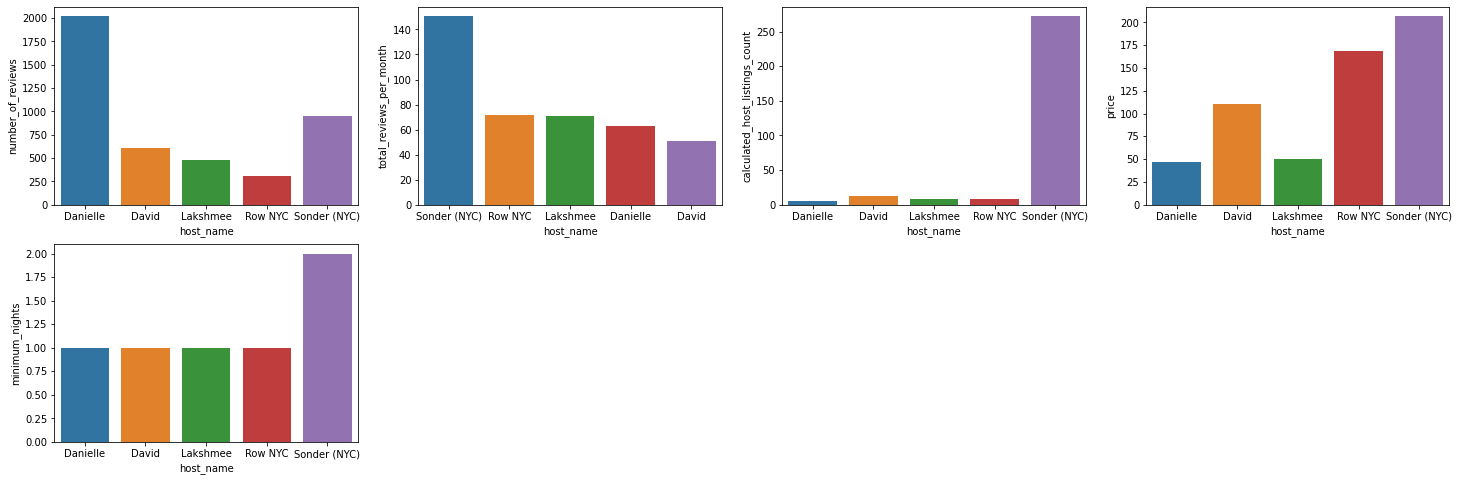

In [55]:
df2=df_r3.groupby(['host_name'])['calculated_host_listings_count'].count().reset_index()
df3=df_r3.groupby(['host_name'])['number_of_reviews'].sum().reset_index()
df4=df_r3.groupby(['host_name'])['minimum_nights'].median().reset_index()
df5=df_r3.groupby(['host_name'])['price'].mean().reset_index()


plt.figure(figsize=(25,8))

plt.subplot(2,4,3)
sns.barplot(x=df2.host_name, y=df2.calculated_host_listings_count)

plt.subplot(2,4,2)
sns.barplot(x=df_r2.host_name, y=df_r2.total_reviews_per_month)

plt.subplot(2,4,1)
sns.barplot(x=df3.host_name, y=df3.number_of_reviews)

plt.subplot(2,4,5)
sns.barplot(x=df4.host_name, y=df4.minimum_nights)

plt.subplot(2,4,4)
sns.barplot(x=df5.host_name, y=df5.price)

* Sonder has the highest review per month, highest listing count, and most of his properties are in Manhattan which is the most densely populated among the 5 boroughs of New York city. Hence Sonder is the busiest host.

* Most of his properties are entire home/apt, with an average price of 251$ and the minimum_night stay is 2 nights.

* In the given data Danielle has the highest number of reviews that is 2017 reviews. but the rate of reviews is 62 reviews per month, where as Soder got 946 reviews , and the rate of reviews is 150 reviews per month , means Sonders booking rate is more than Danielle, hence Sonder is the busiest among all. 